In [1]:
from my_functions import *

orbits fs = 0.05 Hz, orbits t0 = 12160.0 s,  orbit_duration = 1424.0 d
Number of Verification Binaries = 1


In [2]:
d,dr = -1,dur_range[-1]
fp1 = 'measurements/tm_asds/'+str(dr)+'d/1/fs0.txt'
fp2 = "measurements/tm_asds/"+str(dr)+"d/mdata/binary_"

rawdata = ascii.read(fp1)
fsdata = np.array([rawdata['t'],rawdata['A'],rawdata['E']])
# print (fsdata.shape)
# mdata_1b = np.zeros((1+2*N2,len(fsdata[0])))

# mdata = np.zeros((Ngalbins,1+2*N2,len(fsdata[0])))
# print (mdata_1b.shape)
# print (mdata.shape)
# for j in range(Ngalbins):
#     rawdata = ascii.read(fp2+str(j)+'.txt')
#     mdata_1b[0] = rawdata['t']
#     for i in range(N2):
#         mdata_1b[1+i*2:3+i*2] = np.array([rawdata['A'+str(i)],rawdata['E'+str(i)]])
#     mdata[j] = mdata_1b

# mdata_tot_A0 = np.zeros((3,len(fsdata[0])))
# mdata_tot_A0[0] = mdata[0][0]
# for i in range(2):
#     for j in range(Ngalbins):
#         # plt.plot(mdata[0][0],mdata[j,1+2*i+N2//2])
#         # plt.show()
#         mdata_tot_A0[i+1] += mdata[j,2+i+N2//2]
# print (mdata_tot_A0.shape)
# # plt.plot(mdata_tot_A0[0],mdata_tot_A0[1])

In [3]:
mdata = np.zeros(fsdata.shape)

rawdata = ascii.read(fp2+'0.txt')

mdata[0] = rawdata['t']
mdata[1] = rawdata['A'+str(int(N2//2))]
mdata[2] = rawdata['E'+str(int(N2//2))]


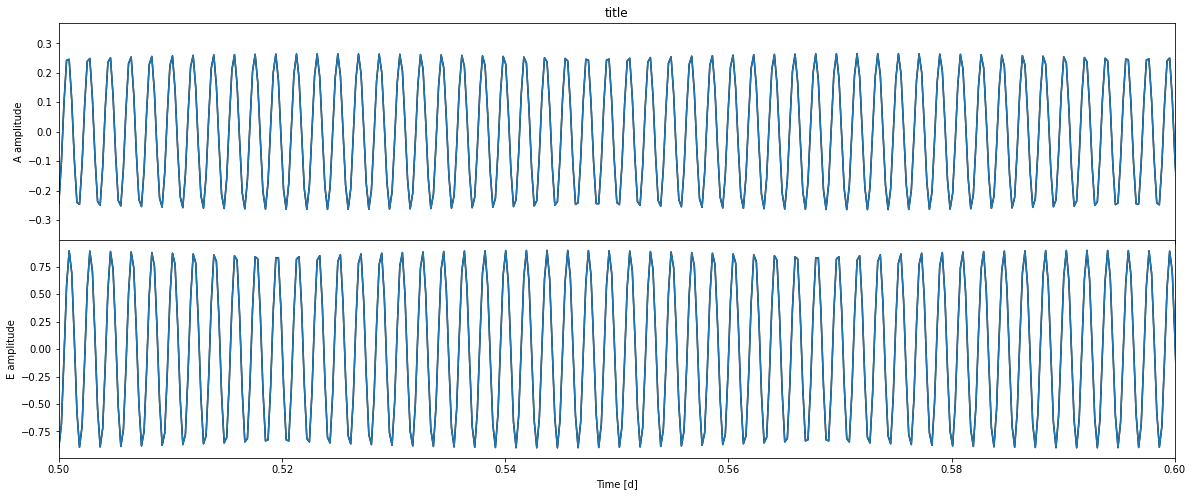

In [4]:

# plt.plot(x,y,c='black',alpha=.8)
for j in [range(N2)[N2//2]]:
    fig, axs = plt.subplots(2,sharex=True,figsize=(20,8),gridspec_kw={'hspace':0})
    for k in range(2):
            # axs[k].plot(mdata_1b[0]/day,mdata_1b[1+2*j+k],label=str(N2-N2//2))
        axs[k].plot(fsdata[0]/day,fsdata[1+k],c='black')
        axs[k].plot(mdata[0]/day,rawdata[rec[k]+str(int(j))])
        axs[k].set_ylabel("{} amplitude".format(rec[k]))
        # axs[k].set_ylim(1e-5*np.array([-1,1]))
    axs[0].set_title("title")
    # axs[0].legend(loc=1)
    axs[k].set_xlim(.5,.6)
    axs[k].set_xlabel("Time [d]")
    plt.show()

In [5]:
print (Amp_true)

[6.4e-15]


(array([0.00000000e+00, 2.36966825e-06, 4.73933649e-06, ...,
       2.49952607e-02, 2.49976303e-02, 2.50000000e-02]), array([6.89055017e-12, 1.37741819e-11, 1.37734990e-11, ...,
       1.16482761e-11, 1.16482430e-11, 5.82414045e-12]))


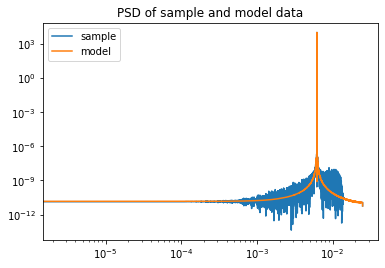

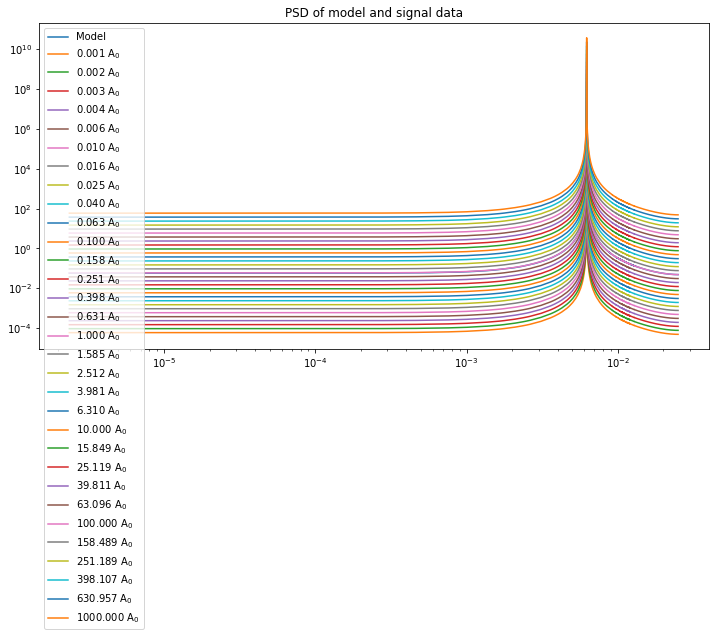

In [6]:
tmp = psd_func(fsdata[1])
tmp2 = psd_func(mdata[1])
print (tmp)
plt.title("PSD of sample and model data")
# plt.axvline(f_true[0],c='black')
plt.loglog(tmp[0],tmp[1],label='sample')
plt.loglog(tmp2[0],tmp2[1],label='model')
plt.legend()
plt.show()

fs_fft = make_fft(fsdata)

plt.figure(figsize=(12,6))
plt.title("PSD of model and signal data")
# plt.axvline(f_true[0],c='black')
plt.loglog(fs_fft[0].real,abs(fs_fft[1]*fs_fft[1]),label="Model")
for j in range(N2):
    mdata_tmp = np.array([rawdata['t'], rawdata['A'+str(int(j))],rawdata['E'+str(int(j))]])
    m_fft = make_fft(mdata_tmp)
    plt.loglog(m_fft[0].real,abs(fs_fft[1]*m_fft[1]),label="{:.3f} A$_0$".format(Amp_range[0,j]/Amp_true[0]))
    # print (np.sum(abs(fs_fft[1]*m_fft[1])))
# plt.xlim(f_true[0]*np.array([0.99,1.01]))
plt.legend(loc=2)
plt.show()

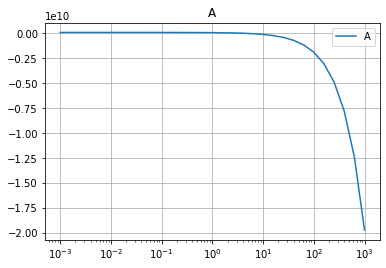

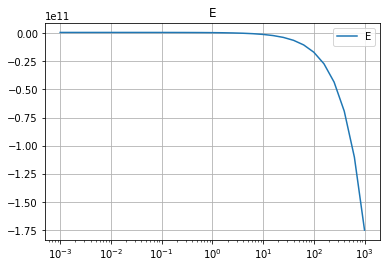

In [13]:
L_range = np.zeros((2,N2))

fs_fft = make_fft(fsdata)
fs_fft2 = FFT(fsdata[1])
df = (fs_fft[0][1]-fs_fft[0][0]).real

for j in range(N2):
    mdata_tmp = np.array([rawdata['t'], rawdata['A'+str(int(j))],rawdata['E'+str(int(j))]])
    m_fft = make_fft(mdata_tmp)
    
    for k in range(2):
        # inner_int = fs_fft[k+1]*m_fft[k+1]*df
        inner_int = np.sum(np.abs((np.conj(fs_fft[k+1])*m_fft[k+1]) + (fs_fft[k+1] * np.conj(m_fft[k+1]))) - 0.5*np.abs(m_fft[k+1]**2))
        # print (abs(np.sum(inner_int)))
        L_range[k][j] = inner_int/((Amp_range[0][j]/Amp_true[0]))
        # L_range[k][j] = abs(np.sum(fs_fft[k+1]*m_fft[k+1]*df))
        # L_range[k][j] = abs(np.sum(fs_fft[k+1]*m_fft[k+1]*df))/ np.sqrt(abs(np.sum(m_fft[k+1]**2*df)))
        # L_range[k][j] = abs(np.sum(fs_fft[k+1]*m_fft[k+1]*df))/((Amp_range[0][j]/Amp_true[0]))
    

for k in range(2):
    plt.semilogx(Amp_range[0]/Amp_true[0],L_range[k],label=rec[k])
    plt.legend()
    plt.title(rec[k])
    plt.grid()
    plt.show()

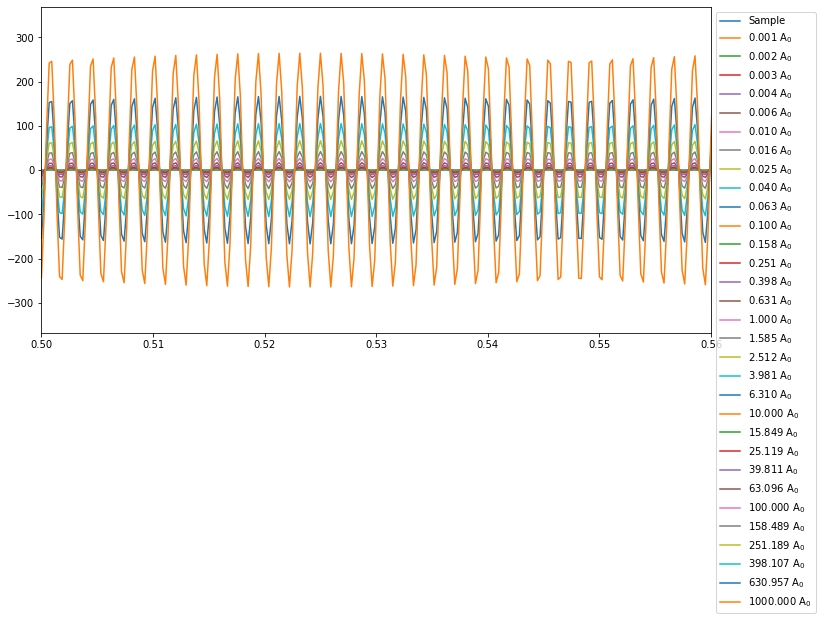

In [8]:

plt.figure(figsize=(12,6))
plt.plot(fsdata[0]/day, fsdata[1],label='Sample')
for j in range(N2):
    mdata_tmp = np.array([rawdata['t'], rawdata['A'+str(int(j))],rawdata['E'+str(int(j))]])
    m_fft2 = FFT(mdata_tmp[1])
    
    newy = IFFT(fs_fft2*m_fft2).real
    # plt.plot(mdata_tmp[0]/day,newy,label="{:.3f} A$_0$".format(Amp_range[0,j]/Amp_true[0]))
    # plt.plot(mdata_tmp[0]/day,mdata_tmp[1],label="model_data")
    plt.plot(mdata_tmp[0]/day,mdata_tmp[1],label="{:.3f} A$_0$".format(Amp_range[0,j]/Amp_true[0]))
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.xlim(.5,.56)
plt.show()


(3, 10549)


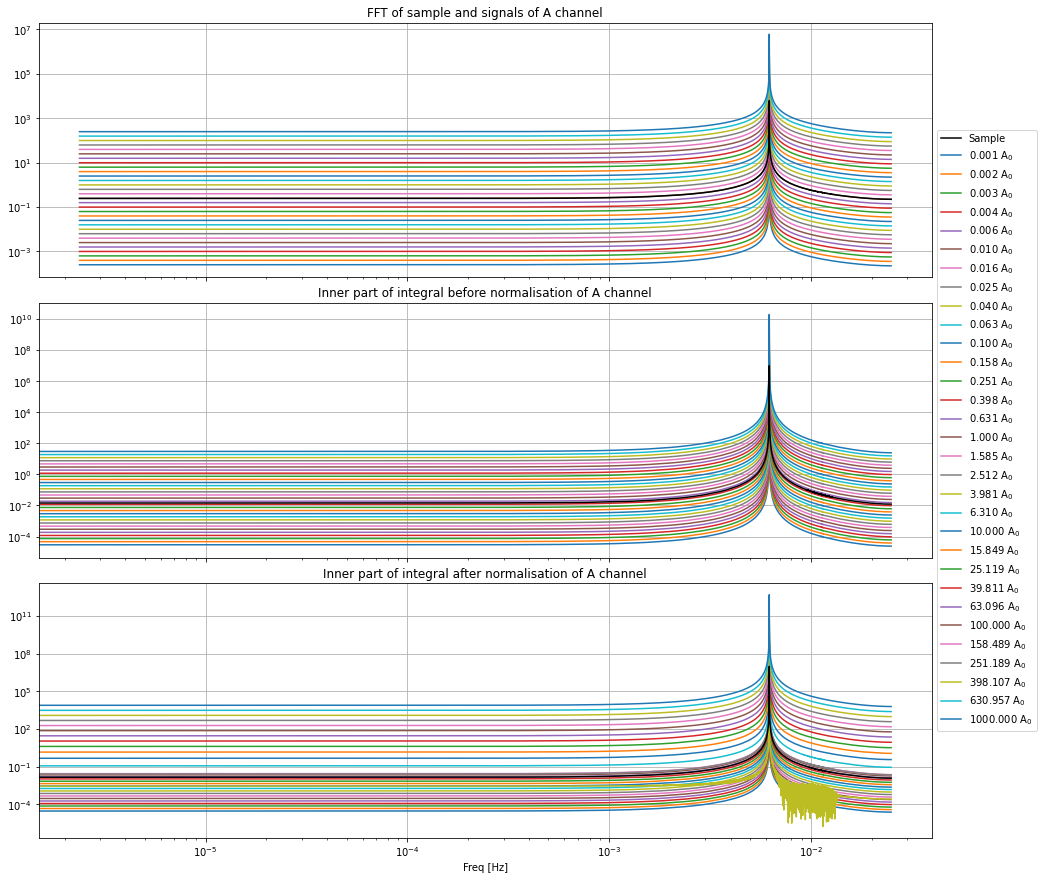

In [31]:
# Make the FFT's of the sample data 
print (fs_fft.shape)
fs_fft = make_fft(fsdata)
fs_fft2A = FFT(fsdata[1])
fs_fft2E = FFT(fsdata[2])
fft_freq = np.fft.fftshift(np.fft.fftfreq(len(fsdata[1]), d=1/fs))

# Prepare plots and plot sample data
n = 3
fig,axs = plt.subplots(n,sharex = True,figsize=(16,5*n), gridspec_kw={"hspace":.1})
# plt.plot(fsdata[0]/day,fsdata[1])
axs[0].set_title("FFT of sample and signals of A channel")
axs[0].plot(fs_fft[0].real, np.abs(fs_fft[1]),label='Sample',c='black',zorder=100)

axs[1].set_title("Inner part of integral before normalisation of A channel")
axs[1].plot(fft_freq.real, np.abs(fs_fft2A**2),label='Sample',c='black',zorder=100)

axs[2].set_title("Inner part of integral after normalisation of A channel")
axs[2].plot(fft_freq.real, np.abs(fs_fft2A**2),label='Sample',c='black',zorder=100)

# Prepare likelyhood range
N3 = 5 # 2 for A&E or 4 for all posibilities for shift and norm
L_range = np.zeros((N3,N2))

for j in range(N2):
# for j in [N2//2]:
# for j in [N2-1]:
# for j in [14,16,18]:
    
    # Import model data and create FFT's
    mdata_tmp = np.array([rawdata['t'], rawdata['A'+str(int(j))],rawdata['E'+str(int(j))]])
    m_fft = make_fft(mdata_tmp)
    m_fft2A = FFT(mdata_tmp[1])
    m_fft2E = FFT(mdata_tmp[2])
    
    # Calculate the inner parts of the integral of the matched filtering equation
    inner_int1A = np.abs((np.conj(fs_fft2A)*m_fft2A) + (fs_fft2A * np.conj(m_fft2A)))# - (np.abs(m_fft[k+1]**2)/2)*df)
    inner_int2A = np.abs((np.conj(fs_fft2A)*m_fft2A) + (fs_fft2A * np.conj(m_fft2A))) - .5*(np.abs(m_fft2A**2))
    inner_int2E = np.abs((np.conj(fs_fft2E)*m_fft2E) + (fs_fft2E * np.conj(m_fft2E))) - .5*(np.abs(m_fft2E**2))
    inner_int3A = np.abs((fs_fft2A - m_fft2A)**2)
    
    # Plot the results of this
    axs[0].plot(m_fft[0].real, np.abs(m_fft[1]),label="{:.3f} A$_0$".format(Amp_range[0,j]/Amp_true[0]))
    axs[1].plot(fft_freq.real, np.abs(inner_int1A), label="{:.3f} A$_0$".format(Amp_range[0,j]/Amp_true[0]))
    axs[2].plot(fft_freq.real, np.abs(inner_int2A), label="{:.3f} A$_0$".format(Amp_range[0,j]/Amp_true[0]))
    
    # Calculate the matched filtering value for each sample data
    if N3 == 5:
        L_range[0][j] = np.sum(inner_int1A)#/((Amp_range[0][j]/Amp_true[0]))
        L_range[1][j] = np.sum(inner_int1A)/((Amp_range[0][j]/Amp_true[0]))
        L_range[2][j] = np.sum(inner_int2A)#/((Amp_range[0][j]/Amp_true[0]))
        L_range[3][j] = np.sum(inner_int2A)/((Amp_range[0][j]/Amp_true[0]))
        L_range[4][j] = np.sum(inner_int3A)
    elif N3 == 2:
        L_range[0][j] = np.sum(inner_int2A)
        L_range[1][j] = np.sum(inner_int2E)
    else:
        print ("ERROR")

# Fix last parts of the plot
axs[1].legend(bbox_to_anchor=(1,.5),loc='center left')
axs[n-1].set_xlabel("Freq [Hz]")
for i in range(3):
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    axs[i].grid()
plt.show()


In [33]:
# for j in [16,18]:
#     mdata_tmp = np.array([rawdata['t'], rawdata['A'+str(int(j))],rawdata['E'+str(int(j))]])
    
#     plt.plot(fsdata[0]/day,fsdata[1])
#     plt.plot(mdata_tmp[0]/day,mdata_tmp[1])
#     plt.show()
#     tmp = make_fft(mdata_tmp)
#     plt.figure(figsize=(20,6))
#     plt.loglog(fs_fft[0].real,np.abs(fs_fft[1]**2))
#     plt.loglog(tmp[0].real,np.abs(tmp[1]**2))
#     plt.show()

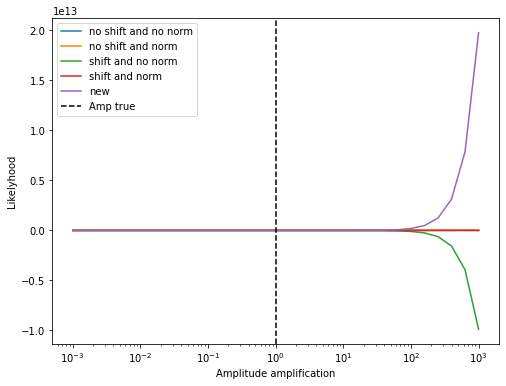

Max index of ns-nn = 30, so at amplitude of 1000.00000 A$_0$
Max index of ns-n = 1, so at amplitude of 0.00158 A$_0$
Max index of s-nn = 16, so at amplitude of 1.58489 A$_0$
Max index of s-n = 0, so at amplitude of 0.00100 A$_0$
Max index of new = 30, so at amplitude of 1000.00000 A$_0$


In [32]:
if N3 == 5:
    labels = ["no shift and no norm","no shift and norm","shift and no norm","shift and norm","new"]
    rec2 = ["ns-nn", "ns-n", "s-nn","s-n","new"]
elif N3 == 2:
    labels = ["A chanel","E chanel"]
    rec2 = ["A", "E"]
else:
    print ("ERROR")
    

# plot likelyhoods
i_max = np.zeros(len(labels),dtype=int)

plt.figure(figsize=(8,6))
for i,lab in enumerate(labels):
    # if i not in [1,3]:
    plt.plot(Amp_range[0]/Amp_true[0], L_range[i], label=lab)
    
    i_max[i] = np.where(L_range[i] == np.max(L_range[i]))[0][0]

plt.xscale('log')
# plt.yscale('log')
plt.xlabel("Amplitude amplification")
plt.ylabel("Likelyhood")
plt.axvline(1,c='black',linestyle='dashed',label="Amp true")
plt.legend()
plt.show()

for i,im in enumerate(i_max):
    print ("Max index of {} = {}, so at amplitude of {:.5f} A$_0$".format(rec2[i],im,Amp_range[0][im]/Amp_true[0]))

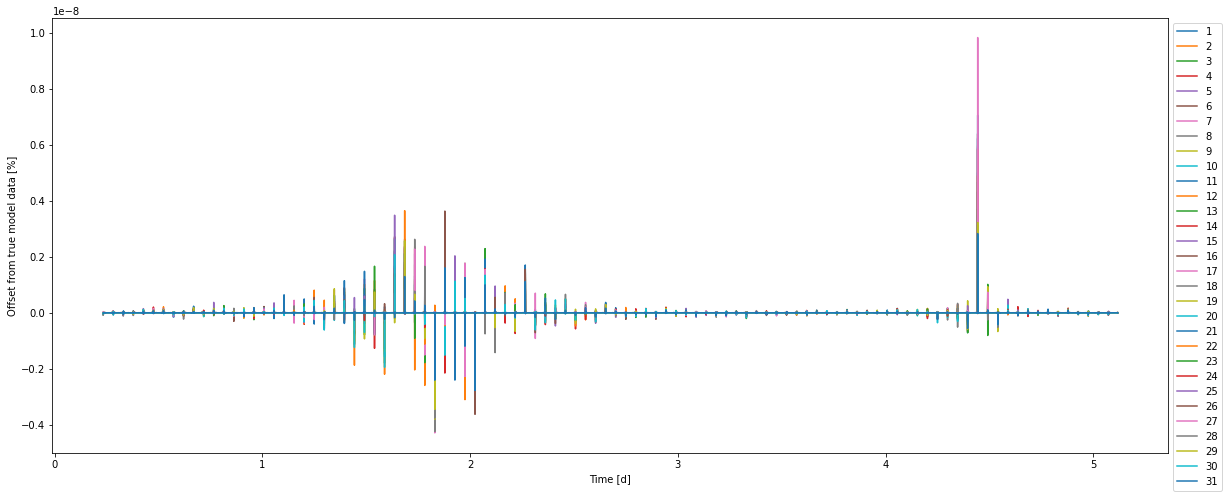

In [41]:
plt.figure(figsize=(20,8))

for j in range(N2):
    mdata_tmp = np.array([rawdata['t'], rawdata['A'+str(int(j))],rawdata['E'+str(int(j))]])
    
    plt.plot(mdata_tmp[0]/day,(mdata_tmp[1]*(Amp_true[0]/Amp_range[0,j])-mdata[1])/mdata[1]*100,label=str(j+1))
plt.xlabel("Time [d]")
plt.ylabel("Offset from true model data [%]")
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()
